In [1]:
import pandas as pd

In [2]:

import numpy as np


In [3]:
import re


In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [5]:
!pip install textblob


In [6]:
!pip install wordcloud

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [9]:
import os
import matplotlib.pyplot as plt

In [10]:
from wordcloud import WordCloud

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
!pip install scikit-learn

In [14]:
import pandas as pd

In [24]:
df = pd.read_csv('vaccination_tweets.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'vaccination_tweets.csv'

In [26]:
os.getcwd()

'C:\\Users\\keert'

In [30]:
os.chdir("C:\\Users\\keert\\Downloads\\vaccination_tweets.csv\\vaccination_tweets.csv")

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\keert\\Downloads\\vaccination_tweets.csv\\vaccination_tweets.csv'

In [32]:
df = pd.read_csv('vaccination_tweets.csv')

In [34]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21-09-2009 15:27,834,666,178,False,13-12-2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10-09-2008 11:28,49165,3933,21853,True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23-04-2020 17:58,152,580,1473,False,12-12-2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11020 non-null  float64
 1   user_name         11020 non-null  object 
 2   user_location     8750 non-null   object 
 3   user_description  10340 non-null  object 
 4   user_created      11020 non-null  object 
 5   user_followers    11020 non-null  int64  
 6   user_friends      11020 non-null  int64  
 7   user_favourites   11020 non-null  int64  
 8   user_verified     11020 non-null  bool   
 9   date              11020 non-null  object 
 10  text              11020 non-null  object 
 11  hashtags          8438 non-null   object 
 12  source            11019 non-null  object 
 13  retweets          11020 non-null  int64  
 14  favorites         11020 non-null  int64  
 15  is_retweet        11020 non-null  bool   
dtypes: bool(2), float64(1), int64(5), object

In [38]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [40]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [44]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [46]:
print(text_df['text'].iloc[0],"\n")#prints first entry in the text column
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [50]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [52]:
def data_processing(text):
    text = text.lower()

In [54]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [56]:
import nltk

In [ ]:
nltk.download('punkt')

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [66]:
text_df = text_df.drop_duplicates('text')

In [68]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [70]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [72]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [74]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [76]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11013 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11013 non-null  object
dtypes: object(1)
memory usage: 172.1+ KB


In [78]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [80]:
from textblob import TextBlob

In [82]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [84]:
text_df.head(10)

,text,polarity
0,Same folks said daikon paste could treat a cyt...,0.000
1,While the world has been on the wrong side of ...,-0.500
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.000
3,"Facts are immutable, Senator, even when you're...",-0.050
4,Explain to me again why we need a vaccine @Bor...,0.000
5,Does anyone have any useful advice/guidance fo...,0.400
6,it is a bit sad to claim the fame for success ...,-0.100
7,There have not been many bright days in 2020 b...,0.675
8,Covid vaccine; You getting it?\r\n\r\n #CovidV...,0.000
9,#CovidVaccine \r\n\r\nStates will start gettin...,0.000


In [88]:

def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [90]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

text_df.head()


,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.00,Neutral
1,While the world has been on the wrong side of ...,-0.50,Negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.00,Neutral
3,"Facts are immutable, Senator, even when you're...",-0.05,Negative
4,Explain to me again why we need a vaccine @Bor...,0.00,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

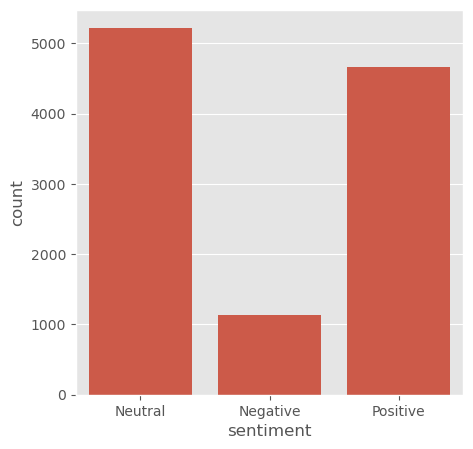

In [92]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

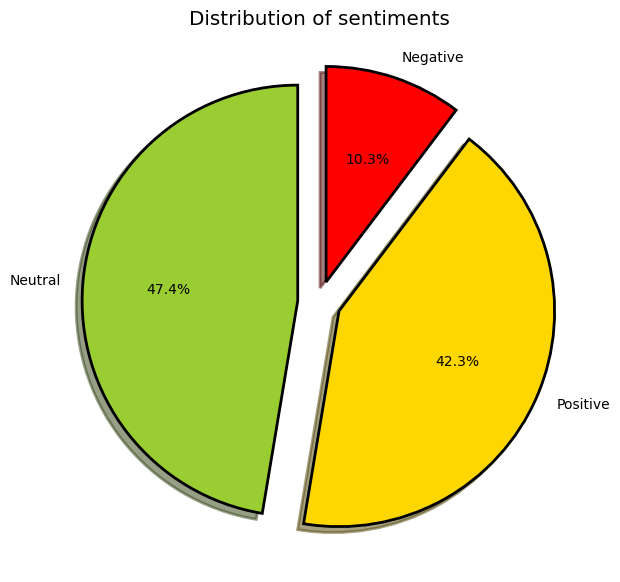

In [94]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [96]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
6575,The best 😂😂😂😂\r\n#CovidVaccine #PfizerBiontech...,1.0,Positive
5193,A wonderful update by #RANP @LoftusOrla at our...,1.0,Positive
3647,Proud receiver of the Covid-19 vaccine! #Pfize...,1.0,Positive
6732,Primera Dosis #PfizerBiontech #Covid_19 #YoMeV...,1.0,Positive
3650,The Best Way To Start 2021 🔥\r\nJABBED!!!😎 \r\...,1.0,Positive


In [98]:
import matplotlib.pyplot as plt

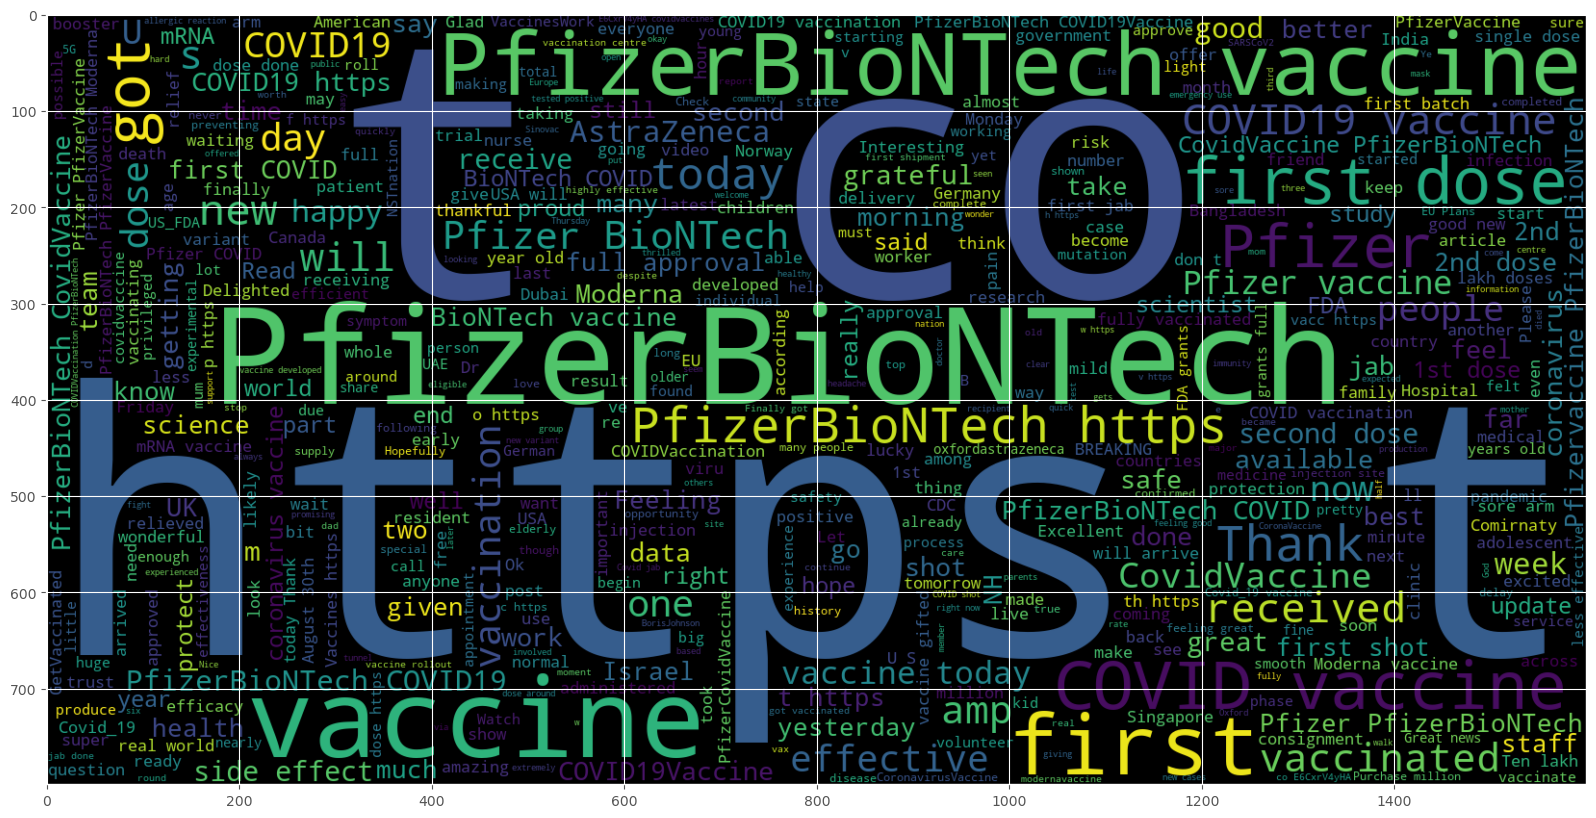

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your text data
text =  ' '.join([word for word in pos_tweets['text']])

# Create the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

In [104]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
3617,"@vonderleyen, lets get some things clear. \r\n...",-6.938894e-18,Negative
3940,"Vaccines can have side effects, but they are e...",-9.251859e-18,Negative
8172,"This should make ""vaccination-center"" life muc...",-4.166667e-03,Negative
7157,@Nas_k27 My second dose due end of next month ...,-6.250000e-03,Negative
2907,In 2015 we were worried about absence of mRNA ...,-6.250000e-03,Negative


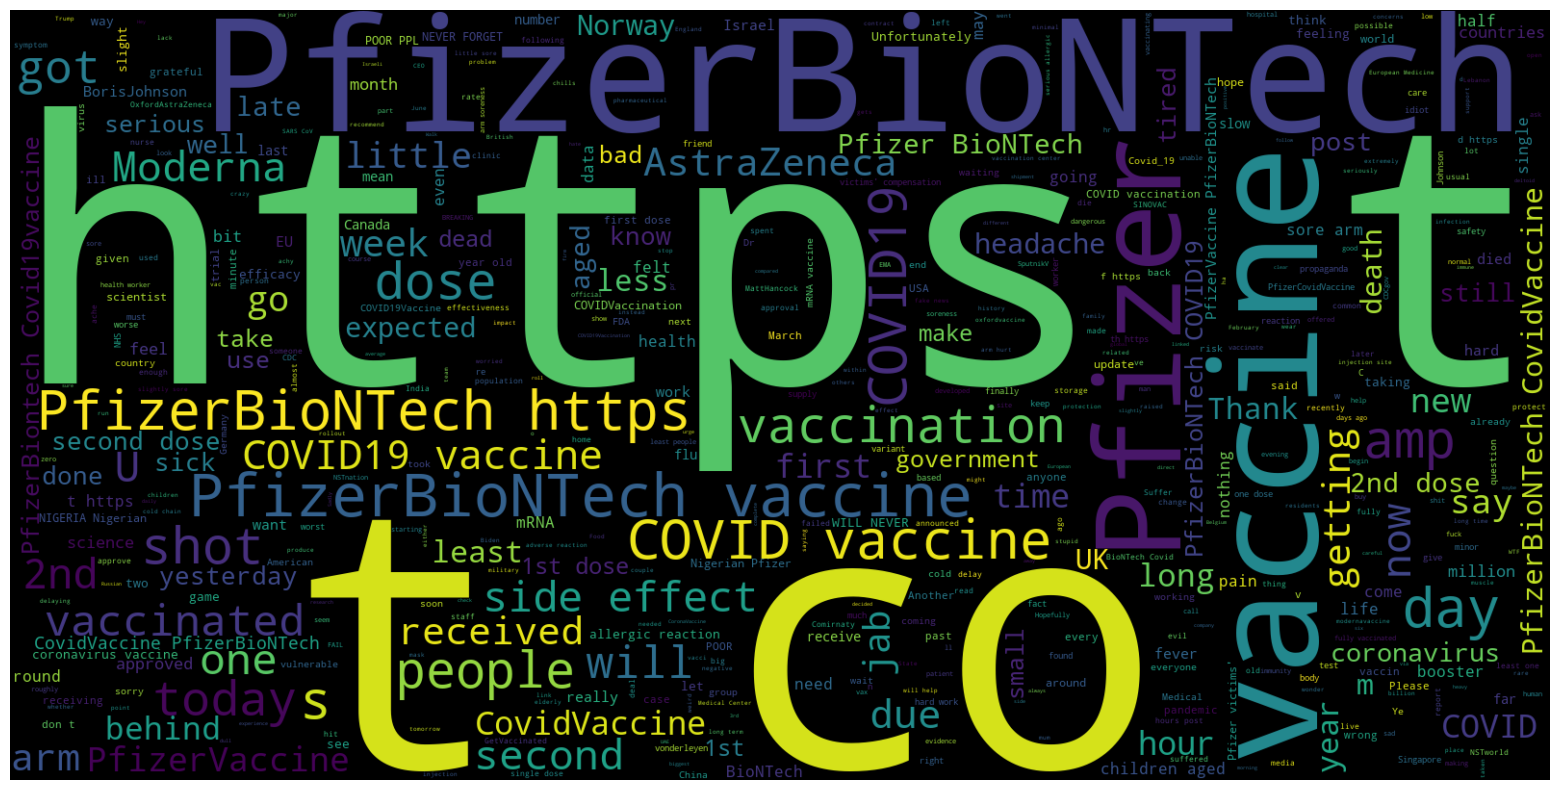

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your text data
text =  ' '.join([word for word in neg_tweets['text']])

# Create the word cloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.0,Neutral
7557,2nd dose #PfizerBiontech #COVID19Vaccination h...,0.0,Neutral
7599,Had my second #PfizerBiontech #CovidVaccine do...,0.0,Neutral
7596,"#NSTnation A total of 25,770 cases or 3.5 per ...",0.0,Neutral
7595,#PfizerProud 👇🏻 of our leadership - #PFECollea...,0.0,Neutral


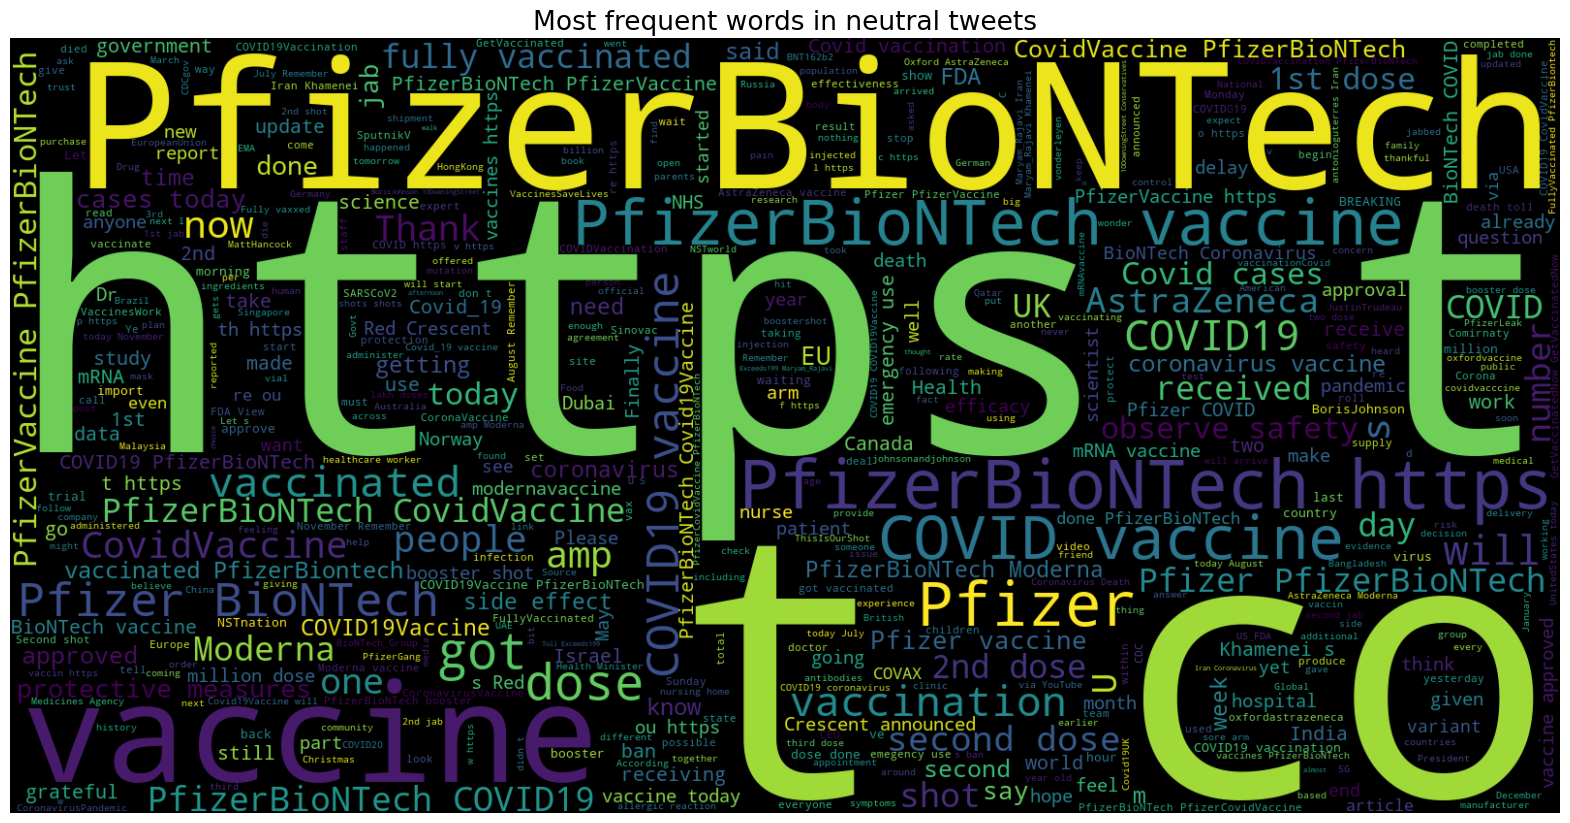

In [110]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()


In [112]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [114]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 113986

First 20 features:
 ['00' '00 000' '00 am' '00 doses' '00 hkt' '00 https' '00 on' '00 tonight'
 '000' '000 987' '000 advers' '000 adverse' '000 albertans'
 '000 americans' '000 and' '000 australians' '000 citizens'
 '000 coronavirus' '000 covid19' '000 covidbrazil']


In [122]:
X= text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8810, 113986)
Size of y_train: (8810,)
Size of x_test: (2203, 113986)
Size of y_test: (2203,)


In [128]:
import warnings
warnings.filterwarnings('ignore')


In [130]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [132]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.38%


In [134]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 77 116  53]
 [  6 998  42]
 [ 15 112 784]]


              precision    recall  f1-score   support

    Negative       0.79      0.31      0.45       246
     Neutral       0.81      0.95      0.88      1046
    Positive       0.89      0.86      0.88       911

    accuracy                           0.84      2203
   macro avg       0.83      0.71      0.73      2203
weighted avg       0.84      0.84      0.83      2203



In [136]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

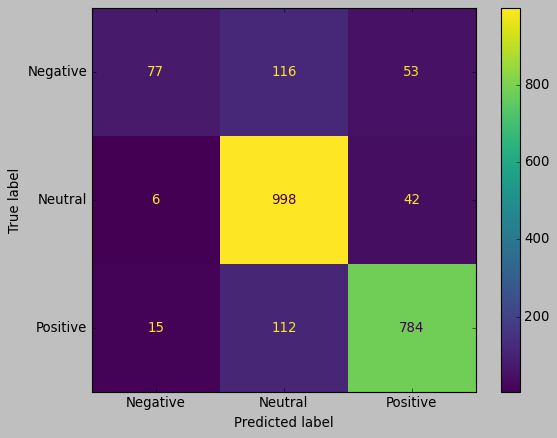

In [138]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [140]:
from sklearn.model_selection import GridSearchCV

In [142]:

param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [143]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [144]:
y_pred = grid.predict(x_test)

In [145]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.70%


In [155]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 81 110  55]
 [  8 994  44]
 [ 16 104 791]]


              precision    recall  f1-score   support

    Negative       0.77      0.33      0.46       246
     Neutral       0.82      0.95      0.88      1046
    Positive       0.89      0.87      0.88       911

    accuracy                           0.85      2203
   macro avg       0.83      0.72      0.74      2203
weighted avg       0.84      0.85      0.83      2203



In [169]:
from sklearn.svm import LinearSVC

In [177]:
from sklearn.svm import LinearSVC

In [181]:
from sklearn.svm import SVC
# create on SVM model
Svc_model = SVC()
#train the model on your training data
Svc_model.fit(x_train, y_train)
# make predictions on the test data
y_pred = Svc_model.predict(x_test)

In [185]:
svc_pred = Svc_model.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 77.80%


In [187]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 15 169  62]
 [  0 998  48]
 [  0 210 701]]


              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11       246
     Neutral       0.72      0.95      0.82      1046
    Positive       0.86      0.77      0.81       911

    accuracy                           0.78      2203
   macro avg       0.86      0.59      0.58      2203
weighted avg       0.81      0.78      0.74      2203



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(Svc_model, param_grid)
grid.fit(x_train, y_train)

In [ ]:
print("Best parameter:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

In [ ]:
!pip install tweepy

In [ ]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [ ]:
import tweepy
print(tweepy.__version__)  # Optional: Check the installed version

In [ ]:
import tkinter as tk
root = tk.Tk()
root.destroy()

In [ ]:
# Install necessary packages if not already installed
!pip install textblob emoji nltk
# Import necessary libraries
from tkinter import *
from textblob import TextBlob
import emoji  # For emoji rendering

# Function to analyze sentiment and display emoji with polarity score
def analyze_sentiment():
    sentence = entry_sentence.get()
    analysis = TextBlob(sentence)
    sentiment = analysis.sentiment.polarity  # Polarity score: -1 to 1
# Determine sentiment and display corresponding emoji with accuracy
    if sentiment > 0:
        result = f"😊 Positive (Polarity: {sentiment:.2f})"
        result_label.config(fg="#28a745")  # Green for positive
    elif sentiment < 0:
        result = f"😢 Negative (Polarity: {sentiment:.2f})"
        result_label.config(fg="#dc3545")  # Red for negative
    else:
        result = f"😐 Neutral (Polarity: {sentiment:.2f})"
        result_label.config(fg="#6c757d")  # Gray for neutral

    result_label.config(text=result)

# Create GUI using Tkinter
root = Tk()
root.title("Twitter Sentiment Analysis")
root.geometry("500x400")
root.configure(bg="#f8f9fa")  # Light background color

# Title
title_label = Label(root, text="Twitter Sentiment Analysis", font=("Helvetica", 20, "bold"), 
                    bg="#343a40", fg="white", pady=10)
title_label.pack(fill=X)

# Sentence input field with styling
entry_frame = Frame(root, bg="#f8f9fa")
entry_frame.pack(pady=20)

entry_sentence = Entry(entry_frame, width=40, font=("Arial", 14), 
                       bd=2, relief="solid", justify=CENTER)
entry_sentence.pack(padx=10, pady=5)

# Predict Button with CSS-like styling
predict_button = Button(root, text="Analyze Sentiment", command=analyze_sentiment, 
                        font=("Arial", 14), bg="#007bff", fg="white", activebackground="#0056b3",
                        relief="raised", padx=10, pady=5)
predict_button.pack(pady=10)

# Result Label to display sentiment and emoji
result_label = Label(root, text="", font=("Arial", 16, "bold"), bg="#f8f9fa")
result_label.pack(pady=20)

# Footer to fill bottom space
footer_label = Label(root, text="Powered by TextBlob & Tkinter", font=("Arial", 10), 
                     bg="#343a40", fg="white", pady=5)
footer_label.pack(fill=X, side=BOTTOM)

# Start the GUI loop
root.mainloop()


In [ ]:
!pip install wordcloud

In [ ]:
! pip install tweety